In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from pprint import pprint
from config import openWeatherKey
import gmaps
import gmaps.datasets
import numpy as np
from THconfig import g_key
gmaps.configure(api_key=g_key)

In [2]:
disasterdataCSV = "Resources/disaster_data.csv"
Data_disaster_df = pd.read_csv(disasterdataCSV)
Data_disaster_df

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2000-0420-CAN,2000,420,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,11.0,140.0,NaN,700.0,840.0,NaN,10000.0,13000.0,67.355759
1,2001-0052-CAN,2001,52,Natural,Meteorological,Storm,NaN,NaN,NaN,Kill,...,10.0,11.0,NaN,NaN,30.0,30.0,NaN,NaN,NaN,69.259340
2,2000-0080-USA,2000,80,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,22.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,14.0,NaN,NaN,175.0,NaN,175.0,NaN,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Natural,Meteorological,Storm,NaN,NaN,NaN,SigDam,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019-0307-USA,2019,307,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,9.0,3.0,NaN,600.0,NaN,600.0,NaN,NaN,NaN,100.000000
533,2020-0148-USA,2020,148,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,38.0,200.0,NaN,NaN,200.0,NaN,NaN,1000000.0,NaN
534,2020-0011-USA,2020,11,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Kill,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
535,2020-0082-USA,2020,82,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Waiting,...,5.0,25.0,300.0,12000.0,NaN,12300.0,NaN,NaN,1100000.0,NaN


In [3]:
weatherDisasterSouth_EastCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterSouth_EastCSV)
wDisaster_df

,Unnamed: 0,Unnamed: 0.1,Location,Dis No,Lat,Long
0,0,0,Kentucky,2000-0080-USA,34.61,-92.66
1,1,2,Morris,2000-0500-USA,40.83,-74.53
2,2,4,Alabama,2000-0919-USA,32.75,-86.75
3,3,5,Georgia,2000-0919-USA,32.75,-83.50
4,4,6,Louisiana,2000-0919-USA,31.00,-92.00
...,...,...,...,...,...,...
2856,2856,4016,Kentucky,2020-0082-USA,34.61,-92.66
2857,2857,4017,Missouri,2020-0082-USA,38.25,-92.50
2858,2858,4018,Mississippi,2020-0082-USA,32.75,-89.75
2859,2859,4019,Georgia,2020-0082-USA,32.75,-83.50


In [4]:
Full_Data_list_df = pd.merge(wDisaster_df, Data_disaster_df, on="Dis No", how="left")
# Full_Data_list_df

In [5]:
SE_wDisaster_df = wDisaster_df.loc[(wDisaster_df["Long"]>-90) & (wDisaster_df["Lat"]<38),["Location","Dis No","Lat", "Long"]]
SE_wDisaster_df

,Location,Dis No,Lat,Long
2,Alabama,2000-0919-USA,32.75,-86.75
3,Georgia,2000-0919-USA,32.75,-83.50
5,North Carolina,2000-0919-USA,35.50,-80.00
6,South Carolina,2000-0919-USA,34.00,-81.00
7,Tennessee,2000-0919-USA,35.75,-86.25
...,...,...,...,...
2852,Mississippi,2020-0011-USA,32.75,-89.75
2853,Alabama,2020-0011-USA,32.75,-86.75
2854,Tennessee,2020-0011-USA,35.75,-86.25
2858,Mississippi,2020-0082-USA,32.75,-89.75


In [6]:
len(SE_wDisaster_df["Location"].unique())

98

In [7]:
SE_Data_list_df = pd.merge(SE_wDisaster_df, Data_disaster_df, on="Dis No", how="left").rename(columns={"Location_x": "Location"})
SE_Data_list_df

,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
1,Georgia,2000-0919-USA,32.75,-83.50,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
2,North Carolina,2000-0919-USA,35.50,-80.00,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
3,South Carolina,2000-0919-USA,34.00,-81.00,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
4,Tennessee,2000-0919-USA,35.75,-86.25,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Mississippi,2020-0011-USA,32.75,-89.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
575,Alabama,2020-0011-USA,32.75,-86.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
576,Tennessee,2020-0011-USA,35.75,-86.25,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
577,Mississippi,2020-0082-USA,32.75,-89.75,2020,82,Natural,Meteorological,Storm,Convective storm,...,5.0,25.0,300.0,12000.0,NaN,12300.0,NaN,NaN,1100000.0,NaN


In [8]:
SE_Data_list_df["Disaster Type"].unique()

array(['Storm', 'Wildfire', 'Drought', 'Flood', 'Epidemic',
       'Extreme temperature'], dtype=object)

In [9]:
trimmed_df = SE_Data_list_df.drop_duplicates(subset= "Dis No", keep="first")
trimmed_df

,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
6,Bullock,2000-0067-USA,32.07,-85.70,2000,67,Natural,Meteorological,Storm,Convective storm,...,14.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,NaN,67.355759
8,Columbia,2000-0338-USA,34.00,-81.03,2000,338,Natural,Meteorological,Storm,Convective storm,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
9,Anderson,2000-0360-USA,34.53,-82.65,2000,360,Natural,Meteorological,Storm,Convective storm,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
14,Florida,2000-0937-USA,28.75,-82.50,2000,937,Natural,Meteorological,Storm,Convective storm,...,17.0,12.0,75.0,NaN,NaN,75.0,NaN,200500.0,500000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Mississippi,2019-0335-USA,32.75,-89.75,2019,335,Natural,Meteorological,Storm,Tropical cyclone,...,15.0,1.0,NaN,NaN,NaN,NaN,NaN,300000.0,600000.0,100.000000
563,Florida,2019-0412-USA,28.75,-82.50,2019,412,Natural,Meteorological,Storm,Tropical cyclone,...,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,100.000000
568,Mississippi,2020-0148-USA,32.75,-89.75,2020,148,Natural,Meteorological,Storm,Convective storm,...,14.0,38.0,200.0,NaN,NaN,200.0,NaN,NaN,1000000.0,NaN
574,Mississippi,2020-0011-USA,32.75,-89.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN


In [10]:
Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).agg({"Location":"count","Total Deaths":"sum","No Injured":"sum","No Affected":"sum","No Homeless":"sum",
                                           "Total Affected":"sum","Insured Damages ('000 US$)":"sum","Total Damages ('000 US$)":"sum"})
# Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).sum(["Location"])
Disastercount_df = Disastercount_df.reset_index(drop=False)
Disastercount_df

,Disaster Subtype,Location,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,Cold wave,1,21.0,0.0,0.0,0.0,0.0,1600000.0,2500000.0
1,Convective storm,92,1770.0,5663.0,85060893.0,32130.0,85098686.0,65337500.0,109587400.0
2,Drought,2,0.0,0.0,0.0,0.0,0.0,0.0,1400000.0
3,Flash flood,1,32.0,0.0,12000.0,0.0,12000.0,1500000.0,2700000.0
4,Forest fire,6,29.0,0.0,1600.0,4005.0,5605.0,150000.0,2000000.0
5,Heat wave,1,123.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Land fire (Brush, Bush, Pasture)",2,33.0,185.0,0.0,10425.0,10610.0,10050000.0,13400000.0
7,Riverine flood,17,100.0,10.0,110300.0,900.0,111210.0,1101000.0,7633000.0
8,Severe winter conditions,1,19.0,0.0,0.0,0.0,0.0,0.0,200000.0
9,Tropical cyclone,33,2625.0,29.0,10692700.0,167570.0,10860299.0,191014500.0,477895360.0


In [11]:
#Total covered by Insuance
insurance_coverage = trimmed_df.groupby(["Year","Dis No"]).sum()
keycolumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
insurance_coverage = insurance_coverage.loc[:,keycolumns].reset_index(drop=False)
insurance_coverage

,Year,Dis No,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2000,2000-0067-USA,22.0,100.0,900.0,0.0,1000.0,0.0,0.0
1,2000,2000-0128-USA,0.0,0.0,600.0,0.0,600.0,0.0,0.0
2,2000,2000-0338-USA,0.0,0.0,0.0,0.0,0.0,0.0,28500.0
3,2000,2000-0360-USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,2000-0465-USA,14.0,0.0,1000.0,0.0,1000.0,0.0,1000000.0
...,...,...,...,...,...,...,...,...,...
167,2019,2019-0412-USA,9.0,0.0,0.0,0.0,0.0,0.0,1200000.0
168,2019,2019-0624-USA,18.0,0.0,0.0,0.0,0.0,175000.0,235000.0
169,2020,2020-0011-USA,12.0,0.0,0.0,0.0,0.0,0.0,1200000.0
170,2020,2020-0082-USA,25.0,300.0,12000.0,0.0,12300.0,0.0,1100000.0


In [12]:
DesiredColumn = desiredColumns = ["Dis No","Total Deaths", "No Injured", "No Affected", "No Homeless", 
                                  "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
insurance = trimmed_df.groupby("Year").agg({"Dis No":"count","Total Deaths":"sum","No Injured":"sum","No Affected":"sum","No Homeless":"sum",
                                           "Total Affected":"sum","Insured Damages ('000 US$)":"sum","Total Damages ('000 US$)":"sum"})
insurance = insurance.loc[:,desiredColumns].reset_index(drop=False)
insurance

,Year,Dis No,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2000,8,52.0,175.0,2500.0,0.0,2675.0,480500.0,2978500.0
1,2001,5,64.0,148.0,103665.0,70030.0,173843.0,3700500.0,6273000.0
2,2002,12,357.0,266.0,21102.0,351.0,21719.0,3703000.0,4251000.0
3,2003,13,161.0,421.0,229695.0,15231.0,245347.0,6657000.0,15246400.0
4,2004,8,196.0,37.0,5038404.0,753.0,5039194.0,26112500.0,47222500.0
5,2005,2,1838.0,0.0,500000.0,0.0,500000.0,61115000.0,127230000.0
6,2006,7,84.0,226.0,71005.0,0.0,71231.0,2913500.0,3586860.0
7,2007,7,136.0,240.0,11600.0,768.0,12608.0,2566000.0,3530000.0
8,2008,10,249.0,327.0,2301550.0,0.0,2301877.0,20955000.0,41592000.0
9,2009,8,66.0,124.0,3750.0,900.0,4774.0,4000000.0,7540000.0


In [14]:
#Counts of Disasters
tick_locations = [value for value in xaxis]
yaxis = Disastercount_df["Location"]
xaxis = np.arange(len(Disastercount_df))
plt.bar(xaxis, yaxis, color='g', alpha=0.5, align="center")
plt.style.use("ggplot")
plt.xticks(tick_locations, Disastercount_df["Disaster Subtype"], rotation= "vertical")
# yaxis

NameError: name 'xaxis' is not defined

Text(0.5, 1.0, 'Total Damage Done Vs Total Insured')

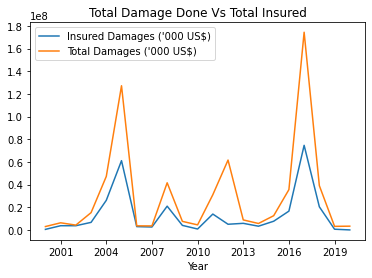

In [15]:
# Total Damanges and Insured Damanges
PlotThis = ["Insured Damages ('000 US$)","Total Damages ('000 US$)"]
df = insurance
lines = df.plot(kind="line",x="Year",y=PlotThis)
lines.xaxis.set_major_locator(plt.MaxNLocator(8))
lines.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Total Damage Done Vs Total Insured")

Text(0.5, 1.0, 'Disaster count')

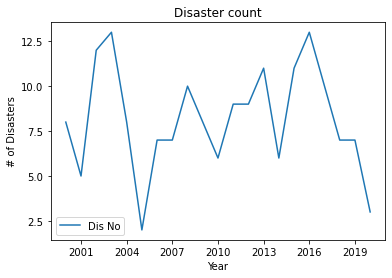

In [16]:
# Disasters per Year
PlotThis = ["Dis No"]
df = insurance
Dis_count = insurance.plot(kind="line",x="Year",y=PlotThis)
Dis_count.xaxis.set_major_locator(plt.MaxNLocator(8))
Dis_count.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.ylabel('# of Disasters')  
  
# displaying the title 
plt.title("Disaster count")

Text(0.5, 1.0, 'Total Death and Injuries per Year')

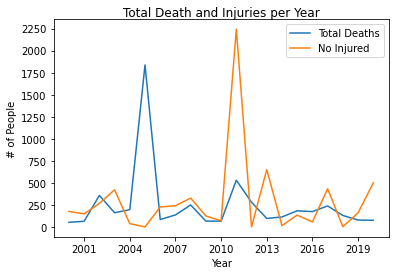

In [17]:
# Total Death and Injuries per Year
PlotThis = ["Total Deaths", "No Injured"]
df = insurance
DeathInjury = df.plot(kind="line",x="Year",y=PlotThis)
DeathInjury.xaxis.set_major_locator(plt.MaxNLocator(8))
DeathInjury.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='Total Death and Injuries per Year',  
          fontweight=10,  
          pad='2.0')

In [18]:
locations = trimmed_df[["Lat", "Long"]]
ratings = trimmed_df["Total Damages ('000 US$)"].astype(float)
max_damages = max(trimmed_df["Total Damages ('000 US$)"])
print(max_damages)

125000000.0


Text(0.5, 1.0, 'Homeless due to Disasters per Year')

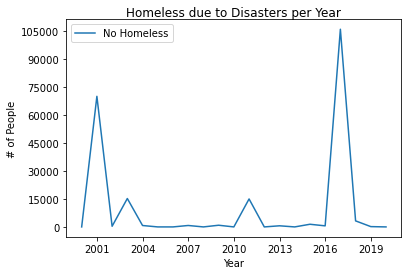

In [19]:
# Homeless due to Disasters per Year
PlotThis = ["No Homeless"]
df = insurance
Homeless = df.plot(kind="line",x="Year",y=PlotThis)
Homeless.xaxis.set_major_locator(plt.MaxNLocator(8))
Homeless.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.ylabel('# of People')  
  
# displaying the title 
plt.title(label='Homeless due to Disasters per Year',  
          fontweight=10,  
          pad='2.0')

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = ratings, dissipating=False, max_intensity=1000000,
                                 point_radius=1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#Creating max Lat/Long/Disaster
trimmed_year_df = trimmed_df.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df
maxdamage_latlong_df = pd.merge(trimmed_year_df,trimmed_df, on=["Year","Total Damages ('000 US$)"], how="left")
maxdamage_latlong_df = maxdamage_latlong_df[["Year","Total Damages ('000 US$)","Location","Dis No","Lat","Long"]]
maxdamage_latlong_df

,Year,Total Damages ('000 US$),Location,Dis No,Lat,Long
0,2000,1100000.0,South Carolina,2000-9339-USA,34.00,-81.00
1,2001,6000000.0,Mississippi,2001-0242-USA,32.75,-89.75
2,2002,2200000.0,Moultrie,2002-0310-USA,31.18,-83.79
3,2003,5000000.0,South Carolina,2003-0139-USA,34.00,-81.00
4,2004,18000000.0,Alabama,2004-0462-USA,32.75,-86.75
5,2005,125000000.0,Mobile,2005-0467-USA,30.78,-88.20
6,2006,1600000.0,Sumner,2006-0171-USA,36.50,-86.45
7,2007,2000000.0,Georgia,2007-0663-USA,32.75,-83.50
8,2008,30000000.0,Tennessee,2008-0384-USA,35.75,-86.25
9,2009,2500000.0,Tennessee,2009-0287-USA,35.75,-86.25


In [22]:
locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])

In [23]:
# Using the template add the hotel marks to the heatmap
info_box_content = """
<dt>Year</dt><dd>{Year}</dd>
<dt>Disaster Number</dt><dd>{Dis No}</dd>
<dt>Total Damages</dt><dd>{Total Damages ('000 US$)}</dd>
</dl>
"""
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
year_info = [info_box_content.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
locations1 = maxdamage_latlong_df[["Lat", "Long"]]


#Add marker to heat map
markers = gmaps.marker_layer(locations1,info_box_content=year_info)
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))